## Summer 2021 CS4641 B Assignment 4

## Instructor: Rodrigo Borela Valente

## Deadline: July 26th, Monday, 11:59 pm

* Submissions will be accepted until July 28th, Wednesday, 11:59pm 

* No unapproved extension of the deadline is allowed. Submissions after July 28th, 11:59 pm will lead to 0 credit.

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.


## Instructions for the assignment

- In this assignment, we have programming and writing questions. Programming questions are marked with **[P]** and writing questions are marked with **[W]**.

- The Q4 is bonus.

- You can directly type the Latex equations in the markdown cells.

- Typing with Latex/Markdown is required for all the written questions. Handwritten answers will not be accepted.

### Using the autograder

- You will find four assignments on Gradescope that correspond to "A4 Programming" and "A4 Written", which add to 125 pts and "A4 Programming Bonus" worth 12.5 pts.

- For "A4 Programming" you will submit your code in the following files:
    * random_forest.py
    * nn.py
        
- For "A4 Programming Bonus" you will submit your code in the following files:
    * cartpole_nn.py

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- For the "A4 Written" part, you will create a pdf (as was done for the theory portion of assignment 1, 2 and 3) and submit it on Gradescope.

- When submitting your assignment, you must **correctly map pages** of your PDF to each question/subquestion where they appear. Improperly mapped questions may not be graded correctly.

# Environment Setup

In [ ]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
import time
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

%load_ext autoreload
%autoreload 2

## 1. Random Forests [40pts] <span style="color:green">[30P] + [10W]<span>

The decision boundaries drawn by decision trees are very sharp, and fitting a decision tree of unbounded depth to a dataset almost inevitably leads to **overfitting**. In an attempt to decrease the variance of our classifier we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging'). This stems from the idea that a collection of weak learners can learn decision boundaries as well as a strong learner.

### 1.1 Random Forest Implementation [20pts] <span style="color:green">[P]<span>


A Random Forest is a collection of decision trees, built as follows:

  1. For every tree we're going to build:

  a. Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset. 
    
  b. From the subsamples in (a), choose attributes at random to learn on in accordance with a provided feature subsampling rate (e.g. for a dataset originally containing 8 features, a subsampling rate of 70% means you will get 5 features).
    
  c. Fit a decision tree to the subsample of instances and feature we've chosen to a certain depth.
    
Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In RandomForests Class, 
1. X is assumed to be a matrix with num_training rows and num_features columns where num_training is the
number of total records and num_features is the number of features of each record. 

2. y is assumed to be a vector of labels of length num_training.

**NOTE:** Lookout for TODOs for the parts that needs to be implemented.
    
Code for submitting to autograder must be in **random_forest.py**.

In [ ]:
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

class RandomForest(object):
    def __init__(self, n_estimators=4, max_depth=4, feat_sample_rate=0.1):
        # helper function. You don't have to modify it
        # Initialization done here
        self.n_estimators = n_estimators    # number of trees in the forest
        self.max_depth = max_depth          # maximum depth a tree can take
        self.feat_sample_rate = feat_sample_rate    # feature sub sample rate
        self.bootstraps_row_indices = []    # subsampled row indices
        self.feature_indices = []           # indices of subsampled features
        self.out_of_bag = []
        self.decision_trees = [sklearn.tree.DecisionTreeClassifier(max_depth=max_depth, criterion='entropy') for i in range(n_estimators)]  # list containing sklearn decision trees objects
        
    def _bootstrapping(self, num_training, num_features): # [10 pts]
        """
        TODO: 
        - Randomly select a sample dataset of size num_training **with** replacement from the original dataset. 
        - Randomly select certain number of features (num_features denotes the total number of features in X, 
          feat_sample_rate denotes the percentage of features that are used to fit each decision tree) **without** replacement from the total number of features.
        
        Return:
        - row_idx: the row indices corresponding to the row locations of the selected samples in the original dataset.
        - col_idx: the column indices corresponding to the column locations of the selected features in the original feature list.
        
        Reference: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
        
        Hint: Consider using np.random.choice.
        """
        
        #  Delete this line when you implement the function
        raise NotImplementedError
         
    def bootstrapping(self, num_training, num_features):
        # helper function. You don't have to modify it
        # Initializing the bootstap datasets for each tree
        for i in range(self.n_estimators):
            total = set(list(range(num_training)))
            row_idx, col_idx = self._bootstrapping(num_training, num_features)
            total = total - set(row_idx)
            self.bootstraps_row_indices.append(row_idx)
            self.feature_indices.append(col_idx)
            self.out_of_bag.append(total)

    def fit(self, X, y): # [10 pts]
        """
        TODO:
        Train decision trees using the bootstrapped datasets.
        Note that you need to use the row indices and column indices.
        
        X: NxD numpy array, where N is number 
           of instances and D is the dimensionality of each 
           instance
        y: Nx1 numpy array, the corresponding target labels

        Return:
            None. Calling this function should simply train the tree objects
            contained in self.decision_trees with your bootstrapped data.
        """
        
        #  Delete this line when you implement the function
        raise NotImplementedError

    def OOB_score(self, X, y):
        # helper function. You don't have to modify it
        # This function computes the accuracy of the random forest model predicting y given x.
        accuracy = []
        for i in range(len(X)):
            predictions = []
            for t in range(self.n_estimators):
                if i in self.out_of_bag[t]:
                    predictions.append(self.decision_trees[t].predict(np.reshape(X[i][self.feature_indices[t]], (1,-1)))[0])
            if len(predictions) > 0:
                accuracy.append(np.sum(predictions == y[i]) / float(len(predictions)))
        return np.mean(accuracy)

### 1.2 Hyperparameter tuning [10pts] <span style="color:green">[P]<span>

In machine learning, hyperparameters are parameters that are set before the learning process begins. The max_depth, num_estimators, or feat_sample_rate variables from 1.1 are examples of different hyperparameters for a random forest model. In this question you will tune the hyperparameters for the following task.

#### Problem description
Imagine that we are doctors working on a cure for heart disease by using machine learning to categorize patients. We know that narrowing arteries are an early indicator of disease. We are tasked with the responsibility of coming up with a method for determining the likelihood of patient having narrowing arteries. We will then use this information to decide which patients to run further tests on for treatment.

After much deliberation amongst the team, you come to a conclusion that we can use past patient data to predict the future occurence of disease.

We will use our random forest algorithm from Q1.1 to predict if a patient may have indicators of heart disease.

You can find more information on the dataset [here](https://archive.ics.uci.edu/ml/datasets/heart+disease).

#### Loading the dataset
The dataset that has beeb collected has the following features:

Only 13 used out of a potential 76

Inputs:

  1. (age)
  2. (type)
  3. (cp) chest pain type
  4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
  5. (chol) serum cholestoral in mg/dl
  6. (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  7. (restecg) resting electrocardiographic results:
    -  Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
  8. (thalach) maximum heart rate achieved
  9. (exang) exercise induced angina (1 = yes; 0 = no)
  10. (oldpeak) ST depression induced by exercise relative to rest
  11. (slope) the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
  12. (ca) number of major vessels (0-3) colored by flourosopy
  13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect

Output:

  1. (num) target value:
    - 0, corresponds to less than 50% chance of narrowing arteries
    - 1, corresponds to more than 50% chance of narrowing arteries
    
Your random forest model will try to predict this variable.

In [ ]:
# Logic for loading in datasets. DO NOT MODIFY anything in this block.

#This is a Helper cell. DO NOT MODIFY CODE IN THIS CELL
from sklearn import preprocessing
import pandas as pd
preprocessor = preprocessing.LabelEncoder()

data_train = pd.read_csv("heart_disease_cleaveland_train.csv")
data_test = pd.read_csv("heart_disease_cleaveland_test.csv")

X_train = data_train.drop(columns = 'num')
y_train = data_train['num']
y_train = y_train.to_numpy()
y_train[y_train > 1] = 1
X_test = data_test.drop(columns = 'num')
X_test = np.array(X_test)
y_test = data_test['num']
y_test = y_test.to_numpy()
y_test[y_test > 1] = 1
#y_test = np.array()
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [ ]:
"""
TODO: 
n_estimators defines how many decision trees are fitted for the random forest (at least 10). 
max_depth defines a stop condition when the tree reaches to a certain depth.
feat_sample_rate controls the percentage of features that are used to fit each decision tree.

Tune these three parameters to achieve a better accuracy. You will need to obtain 75% on the 
train set to receive full credit.
"""

# Hint: the range of n_estimators should be from 8 to 12.
#       the range of max_depth should be from 3 to 5
#       the range of feat_sample_rate should be from 0.85 to 0.95
# Feel free to explore more!

n_estimators = 8
max_depth = 2
feat_sample_rate = 0.8

# To submit these values for autograder test update the corresponding parameters
# in the init function of the RandomForest class and submit.

random_forest = RandomForest(n_estimators, max_depth, feat_sample_rate)
random_forest.fit(X_train, y_train)
accuracy=random_forest.OOB_score(X_test, y_test)
    
print("accuracy: %.4f" % accuracy)

### 1.3 Plotting Feature Importance [10pts] <span style="color:green">[W]<span>

While building tree-based models, it's common to quantify how well splitting on a particular feature in a decision tree helps with predicting the target label in a dataset. Machine learning practicioners typically use "Gini importance", or the (normalized) total reduction in entropy brought by that feature to evaluate how important that feature is for predicting the target variable.

Gini importance is typically calculated as the reduction in entropy from reaching a split in a decision tree weighted by the probability of reaching that split in the decision tree. Sklearn internally computes the probability for reaching a split by finding the total number of samples that reaches it during the training phase divided by the total number of samples in the dataset. This weighted value is our feature importance.

Let's think about what this metric means with an example. A high probabiity of reaching a split on "Age" in a decision tree trained on our patient dataset (many samples will reach this split for a decision) and a large reduction in entropy from splitting on "Age" will result in a high feature importance value for "Age". This could mean "Age" is a very important feature for predicting a patients probability of disease. On the other hand, a low probability of reaching a split on "Cholesterol (chol)" in a decision tree (few samples will reach this split for a decision) and a low reduction in entropy from splitting on "Cholesterol (chol)" will result in a low feature importance value. This could mean "Cholesterol (chol)" is not a very informative feature for predicting a patients probability of disease in our decision tree. **Thus, the higher the feature importance value, the more important the feature is to predicting the target label.**

Fortunately for us, fitting a **sklearn.DecisionTreeClassifier** to a dataset automatically computes the Gini importance for every feature in the decision tree and stores these values in a [**featureimportances**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=feature_importances_#sklearn.tree.DecisionTreeClassifier.feature_importances_) variable. Review the docs for more details on how to access this variable

In the function below, display a bar plot that shows the feature importance values for at least one decision tree in your tuned random forest from Q1.2, and briefly comment on whether any features have noticeably higher / or lower importance weights than others. *[Note that there isn't a "correct" answer here. We simply want you to investigate how different features in your random forest contribute to predicting the target variable].*

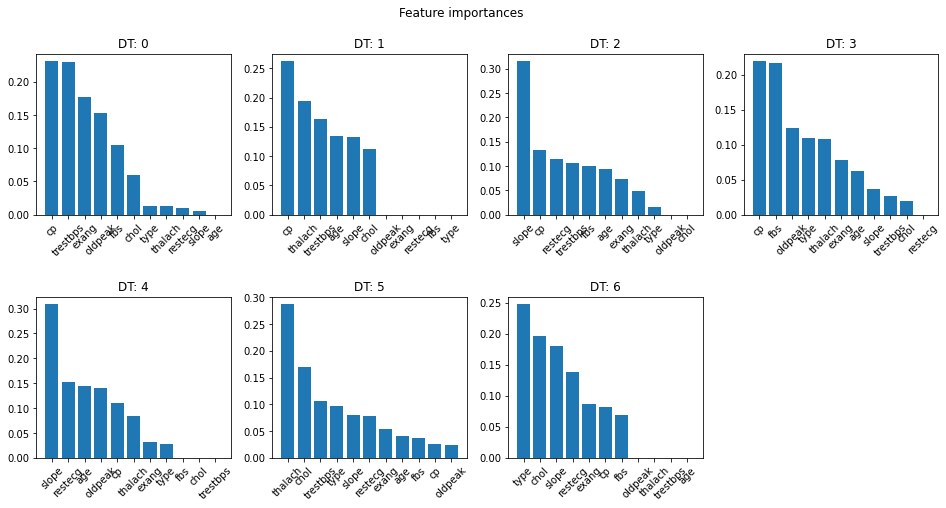

In [ ]:
def plot_feature_importance(self, data_train):
    """
    TODO:
    -Display a bar plot showing the feature importance of every feature in 
    at least one decision tree from the tuned random_forest.

    Args:
        data_train: This is the orginal data train Dataframe containg data AND labels.
            Hint: you can access labels with data_train.columns (https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
    Returns:
        None. Calling this function should simply display the aforementioned feature importance bar chart
    """

plot_feature_importance(data_train)

## 2. SVM [30 Pts] <span style="color:green">[W]</span>

### 2.1 Fitting a SVM classifier by hand [14 Pts]  <span style="color:green">[W]</span>

You are given the following data set (see code block below) from a single feature $X$ and corresponding label $Y \in \{-1, 1\}$:
 
Consider mapping each point to 2-dimensional space using the feature map $h(x) = [x, x^2]$. The max margin classifier has the form:
 
$$\min ||\mathbf{w}||^2 $$
 
$$s.t.$$
 
$$y_i(\mathbf{w}^T \phi(x_i) + b) ≥ 1 \text{  for all } i$$

**Hint:** You can use the code block below to modify the data and identify the support vectors. Once you have that information, you only need to calculate back the parameters. Margin is equal to $\frac{1}{||\mathbf{w}||}$ and half margin is equal to $\frac{2}{||\mathbf{w}||}$.

(1) Are the data points in the 1-D space linearly seperable? Why or why not? (2pts)

(2) Are the data points in the linearly seperable after applying the kernel? Why or why not? (2pts)

(3) Find a vector parallel to the optimal vector $\mathbf{w}$. (2pts)
 
(4) Calculate the value of the margin achieved by this $\mathbf{w}$? (2pts)
 
(5) Solve for $\mathbf{w}$, given that the margin is equal to $1/||\mathbf{w}||$. (2pts)
 
(6) Solve for $b$ using your value for $\mathbf{w}$. (2pts)
 
(7) Write down the form of the discriminant function $f(x) = \mathbf{w}^T\phi(x)+b$ as an explicit function of $x$. (2pts)

Text(0.5, 0, 'x')

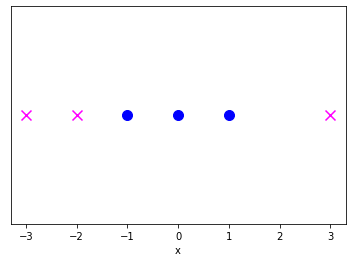

In [ ]:
# DATASET FOR 2.1

X = np.array([-3, -2, -1, 0, 1, 3])
Y = np.array([1, 1, -1, -1, -1, 1])

fig, ax = plt.subplots()
ax.scatter(X[Y<0], np.zeros(X[Y<0].shape), marker='o', color = 'blue', s = 100)
ax.scatter(X[Y>0], np.zeros(X[Y>0].shape), marker='x', color='magenta', s = 100)
ax.yaxis.set_visible(False)
plt.xlabel('x')

### 2.2 SVM Kernels [16 Pts]  <span style="color:green">[W]</span>

(1) (8 points) Given valid kernels $k_1(\mathbf{x}, \mathbf{x}')$ and $k_2(\mathbf{x}, \mathbf{x}')$, prove that the following new kernels will also
be valid: 
 
a. $K(\mathbf{x}, \mathbf{z}) = k_1(f(\mathbf{x}), f(\mathbf{z})), where f: X → X $   
 
b. $K(\mathbf{x}, \mathbf{z}) = k_1(\mathbf{x}, \mathbf{z}) + k_2(\mathbf{x}, \mathbf{z})$  
 
(2) (8 points)  
a. Consider the polynomial kernel $$K(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^T\mathbf{y})^q$$ with q=2. Let $\mathbf{x}, \mathbf{y} \in R^3$ for simplicity. Define one calculation as one multiplication, addition or square operation. Assume that constants (like $\sqrt{2}$) are already calculated and given. Count the calculations after simplifying the terms.
 
a. What is the number of calculations required to find $K(\mathbf{x}, \mathbf{y})$ through direct computation?  (2 points)  
b. Can you find the corresponding feature mapping $\phi(\mathbf{x})$?   (2 points)  
c. What is the number of calculations required for calculating the above feature map for a scalar $x$ ?   (2 points)  
d. What is the number of calculations to find $K(\mathbf{x}, \mathbf{y})$ using $\phi(\mathbf{x})^T \phi(\mathbf{y})$? Comment on this with respect to your answer in (a).   (2 points) 




## 3. Two Layer Neural Network [55 pts]  <span style="color:green">[P]</span>

In neural networks, a neuron corresponds to a unit that outputs: $$z_{i} = h \left( \sum \limits_{j=1}^{n} w_{ij}x_{j}+b_{i} \right) = h(\mathbf{w}_{i}^{T}\mathbf{x}+b_{i})$$ where $\mathbf{w}_{i} \in R^{D}$ is the weight vector, $\mathbf{x} \in R^{D}$ is ONE data point with $D$ features, $b_{i} \in R$ is the bias element, and $h(.)$ is any non linear function that will be described later. 

### Fully-connected Layer
Typically, a modern neural network contains thousands of neurons. Neurons interact in different configurations. In this part we describe a fully connected layer configuration in a neural network, which uses parallel neurons to form a layer.

We extend the previous notation to describe a fully connected layer as follows
$$\mathbf{z} = h(\mathbf{a}), \quad \mathbf{a}=\mathbf{W}\mathbf{x}+\mathbf{b}$$ where $\mathbf{a} \in R^{M}$ is the output vector after appling linear operations, $\mathbf{W} \in R^{M \times N}$ is the weight matrix, and $\mathbf{b} \in R^{M}$ is the bias vector. 

Therefore, we can use the neuron layer to update the data signal. The whole operation can be summarized as,
$$\mathbf{z}^{[l]} = h(\mathbf{W}\mathbf{z}^{[l-1]}+\mathbf{b}) $$ where $\mathbf{z}^{[l-1]}$ is the output of the previous layer as shown in figure below. Since we are going to build a two layer neural network model, $l \in \{1, 2\}$ in this problem.


### Activation Function
There are many kinds of activation function. For this question, we are going to use Relu and Sigmoid.
#### ReLU
The Rectified Linear Unit (ReLU) is one of the most commonly used activation function in neural network models. The function is $h(a)=max(0,a)$. ReLU shares a lot of the properties of linear functions and it tends to work well on most of the problems. The only issue is that the derivative is not defined at a = 0, which we can overcome by assigning the derivative to 0 at a = 0. However, this means that for a ≤ 0 the gradient is zero and again can’t learn.
#### Sigmoid
The sigmoid function is another non-linear function with S-shaped curve. This function is useful in the case of binary classification as its output is between 0 and 1. The mathematical form of the function is $h(a)=\frac{1}{1+e^{-a}}$. One of the main disadvantages for using the sigmoid function on hidden layers is that the gradient is very close to zero over a large portion of its domain which makes it slow and harder for the learning algorithm to learn.

![Relu](https://drive.google.com/uc?id=10g4b7WTbt9Y9QQQ9EJhiqXhQvfEpiXLe)

### Mean Squared Error
It is an estimator that measures the average of the squares of the errors i.e. the average squared difference between the actual and the estimated values. It estimates the quality of the learnt hypothesis between the actual and the predicted values. It's non-negative and closer to zero, the better the learnt function is.

#### Implementation details
For regression problems as in this exercise, we compute the loss as follows:

$$E = \frac{1}{2N}\sum\limits_{i=1}^{N}\left(y_{i} - \hat{y_{i}}\right)^{2}$$

where $y_{i}$ is the true label and $\hat{y_{i}}$ is the estimated label. We use a factor of $\frac{1}{2N}$ instead of $\frac{1}{N}$ to simply the derivative of loss function.

### Forward Propagation
We start by intializing the weights of the fully connected layer using Xavier initialization [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf). During training we pass all the data points through the network layer by layer.
$$\begin{eqnarray}
\mathbf{z}^{[0]} &=& \mathbf{x}\\
\mathbf{a}^{[1]}&=& \mathbf{W}^{[1]}\mathbf{z}^{[0]}+\mathbf{b}^{[1]} \\
\mathbf{z}^{[1]}&=& Relu(\mathbf{a}^{[1]}) \\
\mathbf{a}^{[2]}&=& \mathbf{W}^{[2]}\mathbf{z}^{[1]}+\mathbf{b}^{[2]} \\
\hat{y}=\mathbf{z}^{[2]}&=& Sigmoid(\mathbf{a}^{[2]}) \\
\end{eqnarray}$$

Then we get the output and compute the loss $$E = \frac{1}{2N}\sum\limits_{i=1}^{N}\left(y_{i} - \hat{y_{i}}\right)^{2}$$

### Backward propagation
After the forward pass, we do back propagation to update the weights and biases in the direction of the negative gradient of the loss function. So we update the weights and biases using the following formulas
\begin{equation}
\mathbf{W}^{[2]} := \mathbf{W}^{[2]} - \eta \times \frac{\partial E}{\partial \mathbf{W}^{[2]}} \\
\mathbf{b}^{[2]} := \mathbf{b}^{[2]} - \eta \times \frac{\partial E}{\partial \mathbf{b}^{[2]}} \\
\mathbf{W}^{[1]} := \mathbf{W}^{[1]} - \eta \times \frac{\partial E}{\partial \mathbf{W}^{[1]}} \\
\mathbf{b}^{[1]} := \mathbf{b}^{[1]} - \eta \times \frac{\partial E}{\partial \mathbf{b}^{[1]}}
\end{equation}
where $\eta$ is the learning rate. 



To compute the terms $\frac{\partial E}{\partial \mathbf{W}^{[i]}}$ and $ \frac{\partial E}{\partial \mathbf{b}^{[i]}}$ 
we use chain rule:


\begin{eqnarray}
\frac{\partial E}{\partial \mathbf{W}^{[2]}}&=&\frac{\partial E}{\partial \mathbf{z}^{[2]}}\frac{\partial \mathbf{z}^{[2]}}{\partial \mathbf{a}^{[2]}}\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{W}^{[2]}} \\
\frac{\partial E}{\partial \mathbf{b}^{[2]}}&=&\frac{\partial E}{\partial \mathbf{z}^{[2]}}\frac{\partial \mathbf{z}^{[2]}}{\partial \mathbf{a}^{[2]}}\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{b}^{[2]}}
\end{eqnarray}


$\frac{\partial E}{\partial \mathbf{z}^{[2]}}$ is the differentiation of the MSE function at point $\mathbf{z}^{[2]}$, 

$\frac{\partial \mathbf{z}^{[2]}}{\partial \mathbf{a}^{[2]}}$ is the differentiation of the Sigmoid function at point $\mathbf{a}^{[2]}$, $\frac{\partial\mathbf{a}^{[2]}}{\partial\mathbf{W}^{[2]}}$ is equal to $\mathbf{z}^{[1]}$, and 

$\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{b}^{[2]}}$ is equal to $1$.

To compute $\frac{\partial E}{\partial \mathbf{W}^{[2]}}$, we need $\mathbf{z}^{[2]}, \mathbf{a}^{[2]}, \mathbf{z}^{[1]}$ calculated during forward propagation. Therefore, we need to store these values during the forward propagation to be able to access them during backward propagation. The functional form of the MSE differentiation and Sigmoid differentiation are given by 
\begin{eqnarray}
\frac{\partial E}{\partial \mathbf{z}^{[2]}} &=& \frac{-1}{N}(y-\hat{y}) \\
\frac{\partial \mathbf{z}^{[2]}}{\partial \mathbf{a}^{[2]}} &=& \frac{1}{1+e^{-\mathbf{a}^{[2]}}} \left(1- \frac{1}{1+e^{-\mathbf{a}^{[2]}}} \right) \\
\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{W}^{[2]}} &=& \mathbf{z}^{[1]} \\
\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{b}^{[2]}} &=& 1
\end{eqnarray}

Similarly,
\begin{eqnarray}
\frac{\partial E}{\partial \mathbf{W}^{[1]}}&=&\frac{\partial E}{\partial \mathbf{z}^{[2]}}\frac{\partial \mathbf{z}^{[2]}}{\partial \mathbf{a}^{[2]}}\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{z}^{[1]}} \frac{\mathbf{z}^{[1]}}{\mathbf{a}^{[1]}} \frac{\mathbf{a}^{[1]}}{W^{[1]}}  \\
\frac{\partial E}{\partial \mathbf{b}^{[1]}}&=&\frac{\partial E}{\partial \mathbf{z}^{[2]}}\frac{\partial \mathbf{z}^{[2]}}{\partial \mathbf{a}^{[2]}}\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{z}^{[1]}} \frac{\mathbf{z}^{[1]}}{\mathbf{a}^{[1]}} \frac{\mathbf{a}^{[1]}}{b^{[1]}}
\end{eqnarray}

Where 
\begin{eqnarray}
\frac{\partial \mathbf{a}^{[2]}}{\partial \mathbf{z}^{[1]}} &=& W^{[1]} \\
\frac{\partial \mathbf{z}^{[1]}}{\partial \mathbf{a}^{[1]}} &=&  
\begin{cases}
&0& \text{ if } \mathbf{a}^{[1]} \leq 0 \\
&1& \text{ if } \mathbf{a}^{[1]} > 0 
\end{cases}\\
\frac{\partial \mathbf{a}^{[1]}}{\partial \mathbf{W}^{[1]}} &=& \mathbf{x}\\
\frac{\partial \mathbf{a}^{[1]}}{\partial \mathbf{b}^{[1]}} &=& 1
\end{eqnarray}

Note that $\frac{\partial \mathbf{z}^{[1]}}{\partial \mathbf{a}^{[1]}}$ is the differentiation of the Relu function at $\mathbf{a}^{[1]}$.

Now, let's try to implememt this two layer neural network model!


Code for submitting to autograder must be in **nn.py**.

In [ ]:
'''
TODO:
Implement the neural network methods in the dlnet class.

We are going to use Breast Cancer Wisconsin (Diagnostic) Data Set provided by sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
to train a 2 fully connected layer neural net. We are going to buld the neural network from scratch. 
'''
import numpy as np

class dlnet:

    def __init__(self, x, y, lr=0.003):
        '''
        This method initializes the class, its implemented for you.
        Args:
            x: data
            y: labels
            Yh: predicted labels
            dims: dimensions of different layers
            param: dictionary of different layers parameters
            ch: Cache dictionary to store forward parameters that are used in backpropagation
            loss: list to store loss values
            lr: learning rate
            sam: number of training samples we have

        '''
        self.X = x  # features
        self.Y = y  # ground truth labels

        self.Yh = np.zeros((1, self.Y.shape[1]))  # estimated labels
        self.dims = [30, 20, 1]  # dimensions of different layers

        self.param = {}  # dictionary for different layer variables
        self.ch = {}  # cache variable
        self.loss = []

        self.lr = lr  # learning rate
        self.sam = self.Y.shape[1]  # number of training samples we have
        self._estimator_type = 'classifier'

    def nInit(self):
        '''
        This method initializes the neural network variables, it's already implemented for you.
        Check it and relate to mathematical the description above.
        You are going to use these variables in forward and backward propagation.
        '''
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0])
        self.param['b1'] = np.zeros((self.dims[1], 1))
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1])
        self.param['b2'] = np.zeros((self.dims[2], 1))
        return

    def Relu(self, a): # [2 points]
        '''
        In this method you are going to implement element wise Relu.
        Make sure that all operations here are element wise and can be applied to an input of any dimension.
        Input: a of any dimension
        return: Relu(a)
        '''
        #  Delete this line when you implement the function
        raise NotImplementedError


    def Sigmoid(self, a): # [3 points]
        '''
        In this method you are going to implement element wise Sigmoid.
        Make sure that all operations here are element wise and can be applied to an input of any dimension.
        Input: a of any dimension
        return: Sigmoid(a)
        '''
        #  Delete this line when you implement the function
        raise NotImplementedError


    def dRelu(self, a): # [5 points]
        '''
        In this method you are going to implement element wise differentiation of Relu.
        Make sure that all operations here are element wise and can be applied to an input of any dimension.
        Input: a of any dimension
        return: dRelu(a)
        
        '''
        #  Delete this line when you implement the function
        raise NotImplementedError
        

    def dSigmoid(self, a): # [5 points]
        '''
        In this method you are going to implement element wise differentiation of Sigmoid.
        Make sure that all operations here are element wise and can be applied to an input of any dimension.
        Input: a of any dimension
        return: dSigmoid(a)
        '''
        #  Delete this line when you implement the function
        raise NotImplementedError

    def nloss(self, y, yh): # [5 points]
        '''
        In this method you are going to implement MSE loss.
        Refer to the description above and implement the appropriate mathematical equation.
        Input: y 1xN: ground truth labels
               yh 1xN: neural network output after Sigmoid

        return: MSE 1x1: loss value
        '''
        #  Delete this line when you implement the function
        raise NotImplementedError

    def forward(self, x): # [15 points]
        '''
        Fill in the missing code lines, please refer to the description for more details.
        Check nInit method and use variables from there as well as other implemeted methods.
        Refer to the description above and implement the appropriate mathematical equations.
        donot change the lines followed by #keep.
        '''
        #Todo: uncomment the following 7 lines and complete the missing code
        
        #self.ch['X'] = x                 X  #keep 
        #a1 =  
        #z1 = 
        #self.ch['a1'], self.ch['z1']=a1, z1 #keep 

        #a2 = 
        #z2 = 
        #self.ch['a2'], self.ch['z2']=a2, z2 #keep
        #return z2 #keep

        #  Delete this line when you implement the function
        raise NotImplementedError


    def backward(self, y, yh): # [20 points]
        '''
        Fill in the missing code lines, please refer to the description for more details
        You will need to use cache variables, some of the implemeted methods, and other variables as well
        Refer to the description above and implement the appropriate mathematical equations.
        do not change the lines followed by #keep.
        
        '''
        #Todo: uncomment the following 13 lines and complete the missing part

        # dLoss_z2 =
        # dLoss_a2 =
        # dLoss_W2 =
        # dLoss_b2 =
        # dLoss_z1 =
        # dLoss_a1 =
        # dLoss_W1 =
        # dLoss_b1 =
        # self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2  # keep
        # self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2  # keep
        # self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1  # keep
        # self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1  # keep
        #return dLoss_W2, dLoss_b2, dLoss_W1, dLoss_b1 #keep
        
        #  Delete this line when you implement the function
        raise NotImplementedError


    def gradient_descent(self, x, y, iter=60000, log=True):
        '''
        This function is an implementation of the gradient decent algorithm,
        It is implemented for you.
        '''
        self.nInit()
        for i in range(0, iter):
            yh = self.forward(x)
            loss = self.nloss(y, yh)
            dLoss_W2, dLoss_b2, dLoss_W1, dLoss_b1 = self.backward(y, yh)
            self.loss.append(loss)
            if log:
                if i % 2000 == 0: print("Loss after iteration %i: %f" % (i, loss))
        return

    def predict(self, x):
        '''
        This function predicts new data points
        It is implemented for you
        '''
        Yh = self.forward(x)
        return np.round(Yh).squeeze()



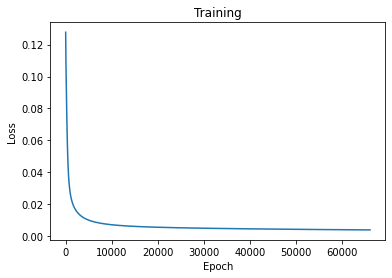

In [ ]:
# helper cell, no need to modify
'''
Training the Neural Network, you do not need to modify this cell
We are going to use Breast Cancer Wisconsin (Diagnostic) Data Set provided by sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
'''
dataset = load_breast_cancer() # load the dataset
x, y = dataset.data, dataset.target
x = MinMaxScaler().fit_transform(x) #normalize data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.1) # initalize neural net class
nn.gradient_descent(x_train, y_train, iter = 66000) #train

# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title('Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# helper cell, do not need to modify
'''
Testing Neural Network with Gradient Descent, you do not need to modify this cell. 
'''
y_predicted = nn.predict(x_test) # predict
print(classification_report(y_test, y_predicted, target_names=dataset.target_names))

## 4. Reinforcement Learning [Bonus] [12.5 pts] <span style="color:green"> [P] + [W]<span>

For this task we use another paradigm to solve the cartpole problem on OpenAI. For the question, **you're only required to implement the neural networks using pytorch and tune the hyperparameters for this experiment, the training logic and reinforcement learning implementation is already completed for you.**

### A Brief Intro to RL

Throughout the course we learned about two paradigms of machine learning, unsupervised and supervised. This question introduces a third category in machine learning called Reinforcement Learning (RL). RL is a type of machine learning technique that enables an agent to learn in an interactive environment by trial and error using feedback from its own actions and experiences. Just like supervised methods reinforcement learning  methods also learn the mapping between input and output, however, unlike supervised learning where the feedback provided to the agent is correct set of actions for performing a task, reinforcement learning uses rewards and punishments as signals for positive and negative behavior.

While the goal in unsupervised learning is to find similarities and differences between data points, in the case of reinforcement learning the goal is to find a suitable action model that would maximize the **total cumulative reward** of the agent. The figure below illustrates the action-reward feedback loop of a generic RL model.

![image.png](https://i.imgur.com/DKLakWc.png)

Q-learning is a commonly used model-free approach which can be used for building such an agent. It revolves around the notion of updating Q values which denotes value of performing action a in state s. The following value update rule is the core of the Q-learning algorithm.

![image-4.png](https://i.imgur.com/FsdHiEE.png)



**For a deeper dive into how reinforcement learning works, you're required to read the paper [Human-level control through deep reinforcement
learning](https://web.stanford.edu/class/psych209/Readings/MnihEtAlHassibis15NatureControlDeepRL.pdf).**

### Solving Cartpole with Reinforcement Learning

The task of this question is to solve the [Cartpole](https://gym.openai.com/envs/CartPole-v1/) problem on the OpenAI gym environment using reinforcement learning. You are given a simulated environment where a pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

![Cartpole](https://i.imgur.com/dQ4xUp1.gif "segment")

#### Setup

This question requires two additional libraries for python, gym and torch, install them using the following command:

```
pip install gym torch
```

In case you face installation errors for the above command, you're recommended to use python 3.6 in a conda environment. You're also recommended to run this notebook locally on your computer rather than collab to be able to see how your agent performs playing Cartpole.

### 4.1 Creating The Neural Network Through PyTorch [3.5 pts] <span style="color:green"> [P]<span>

Refer to the pytorch docs for implementing specific pytorch functions in the following class:

https://pytorch.org/docs/stable/nn.functional.html <br/>
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
    
Code for submitting to autograder must be in **cartpole_net.py**.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import gym
from itertools import chain

'''
This class represents the neural network module, you will implement pytorch functions that takes in
a list of number of nodes in each layer and initialize the pytorch layers accordingly. You're also
required to implement the forward propagation function as given in the description.

Note: You do not need to concern with the dimensions of the torch tensors passed as parameters, 
simply implement the required torch functions.
'''
    
class Net(nn.Module):

    def __init__(self, layers):
        # No need to modify, initialization done here
        
        super(Net, self).__init__()

        # Create layers for the neural network
        self.fc = self.create_layers(layers)
        
        for i in range(len(self.fc)):
            self.__setattr__(str(i), self.fc[i])
            
    def create_layers(self, layers): # [1.5 pts]
        """
        TODO:
        Return a list of linear pytorch layers corresponding the the input parameter 'layers'
        
        Inputs:
        layers: 1-D array that represents number of nodes in each layer 
        
        return: List of linear pytorch layers, see https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

        """
        #  Delete this line when you implement the function
        raise NotImplementedError
    
    
    def forward(self, x): # [1.5 pts]
        """
        TODO:
        Return the output of the forward propagation of the neural network. Implement relu activations
        for each layer defined in self.fc.
        
        Inputs:
        x: Torch tensor containing inputs to the neural network
        
        return: The torch tensor as a result of the forward propagation output

        """
        #  Delete this line when you implement the function
        raise NotImplementedError
    
    def get_loss(self, pred, target): # [1 pts]
        """
        TODO:
        Compute the mse loss between predicted and target values.
        
        Inputs:
        pred: Torch tensor containing output / prediction values
        target: Torch tensor containing target values
        
        return: The torch tensor as a result of the forward propagation output

        """
        #  Delete this line when you implement the function
        raise NotImplementedError

### 4.2 Training the network and parameter tuning [9 pts] <span style="color:green">[W]<span>

Configure the parameters in the cell below to tune the training algorithm, after you train the algorithm the following cell runs the algorithm for 15 episodes and calculates the average cumulative reward. **To get credit for this question you are required to get an average of at least 150 on the test session. You will be awarded full credit for any score above 350**. The first person to get a score of 2000+ gets ice cream :).

#### Hyperparameter tuning

In [ ]:
"""
TODO:
Tune the given hyperparameters. You do not have to submit this in autograder.
"""

def getConfig():
    
    Gamma = 0.9                # Q-learning discount factor      Ideal range 0.9 ~ 0.99
    Alpha = 0.01            # Learning rate,                  Ideal range 0.00005 ~ 0.0004
    BatchSize = 3             # Training batch size,            Ideal range 10~50
    
    # Layers with lesser nodes might result in better training times
    HiddenLayers = [150,100]   # Size of hidden layers of the network
    
    # Worst case, it shouldn't take you more than 2000 episodes to train your model
    Episodes = 200            # Training episodes               

    # The following parameters are ideal, however, you can change them to experiment with your results
    Epsilon = [0.9, 0.05]      # Take random action with Epsilon probability, [start, end]
    EpsilonDecay = 200         # Epsilon decay factor, higher the number slower the decay
    MemorySize = 200           # Replay memory size
    MemoryInitFill = 0.2       # Ratio of initial replay memory fill with random transitions 
    TargetUpdate = 10          # Update target network every 'x' intervals

    return[Gamma, Alpha, Epsilon, EpsilonDecay, BatchSize, MemorySize,
                    MemoryInitFill, TargetUpdate, HiddenLayers, Episodes]

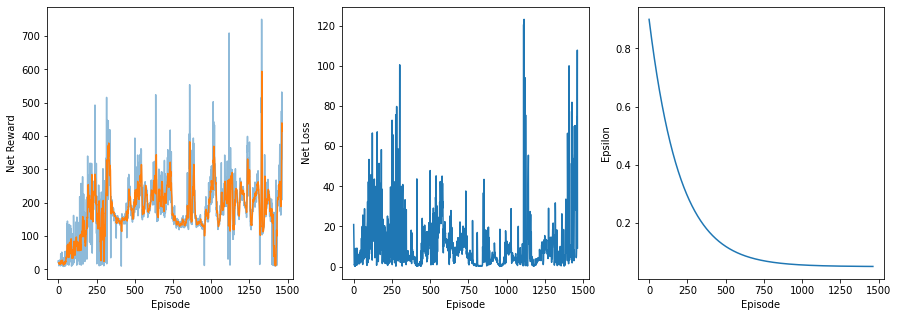

In [ ]:
from cartpole import train, test

# You can turn off render for faster training
render = True
m = train(getConfig(), Net, render)

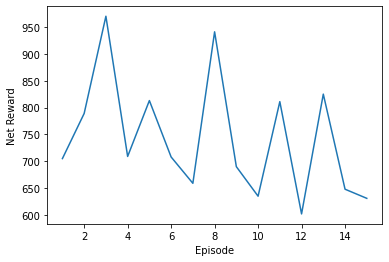

Score: 742.4


In [ ]:
test(m, render=True)